In [1]:
pd.set_option("display.max_columns", 200)

In [2]:
df_high = pd.read_csv('high.csv')
df_mid = pd.read_csv('mid.csv')
df_low = pd.read_csv('low.csv')
df_raku = pd.read_csv('raku.csv')

In [3]:
df_high = df_high[0:df_high.shape[0]//2]
df_mid = df_mid[0:df_mid.shape[0]//2]
df_low= df_low[0:df_low.shape[0]//2]
df_raku = df_raku[0:df_raku.shape[0]//2]

In [4]:
df = pd.concat([df_high, df_low, df_mid, df_raku], axis=0, ignore_index=True)

# Color

In [5]:
df['Color'] = df['Color'].str.lower()
df['Color'].value_counts()

clear                              121
white                              100
black                               76
green                               56
blue                                41
brown                               28
amber                               28
red                                 23
orange                              16
tan                                 13
turquoise                           13
transparent clear                   10
bronze metallic                      9
clear transparent                    8
light green                          8
opaque white                         7
blue-green                           7
translucent green                    6
chartreuse                           6
metallic bronze                      5
deep blue                            5
copper red                           5
grey blue                            5
blue to green                        4
gray                                 4
varies                   

In [6]:
df['Color'].replace(['opaque white', 'translucent white', 'off white'], 'white', inplace=True)
df['Color'].replace(['transparent clear', 'clear transparent', 'semi-opaque'], 'clear', inplace=True)

In [7]:
tmp = []
threshold = df.shape[0]/100
for i in range(df['Color'].nunique()):
    if df['Color'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Color'].value_counts(sort=False).index[i])
len(tmp)

210

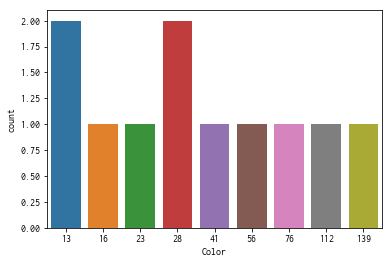

In [8]:
df['Color'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Color'].value_counts())

In [9]:
df['Color'].value_counts()

clear        139
white        112
black         76
green         56
blue          41
amber         28
brown         28
red           23
orange        16
tan           13
turquoise     13
Name: Color, dtype: int64

In [10]:
for ix in range(len(df)):
    if type(df['Color'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df

,Glaze name,Cone,Color,Testing,Surface,Firing,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13,Recipe14
0,Blue lithium,010-09,blue,NaN,Semi-gloss,Ox. or Red.,Opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Matt Strontium Crystal Magic Steven Hill,10,white,NaN,Satin matt,Reduction,Opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Alkaline High Fire 1,9-10,clear,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alkaline Lee Rexrode,9,white,NaN,Satin matt,Oxidation,Semi-opaque,Barium carbonate\t36.60,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alkaline Lee Rexrode Sr,9,white,NaN,Satin matt,Oxidation,Translucent,Strontium carbonate\t27.50,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Amber Barnard,10,amber,NaN,Gloss,Reduction,Transparent,Barnard clay\t33.00,Wollastonite\t13.00,Whiting\t15.00,Custer feldspar\t20.00,Gerstley borate\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amber Celadon McKenzie Smith,9-10,amber,NaN,Gloss,Reduction,Transparent,Wood ash\t22.00,Whiting\t17.00,Custer feldspar\t41.00,Ball clay\t4.00,Flint\t17.00,Red iron oxide\t8.00,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amber Celadon Nick's Ochre,10,amber,NaN,Gloss,Reduction,Transparent,Custer feldspar\t26.50,Whiting\t22.20,Flint\t25.60,Ball clay\t25.60,Yellow ochre\t8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Amber Celadon VC no albany,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t19.00,Gerstley borate\t3.00,Dolomite\t2.00,Wollastonite\t9.00,Whiting\t14.00,Redart\t29.00,Barnard clay\t10.00,EPK\t2.00,Flint\t10.00,Red iron oxide\t2.00,NaN,NaN,NaN,NaN
9,Amber Gulden's,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t30.00,Whiting\t25.00,Flint\t25.00,Kentucky OM #4\t10.00,Gerstley borate\t3.00,Bentonite\t2.00,Yellow iron oxide\t7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Glaze name

In [13]:
df['Glaze name'] = df['Glaze name'].str.lower()
df['Glaze name'].value_counts()

black matte                                   3
aventurine ferro frit 2                       2
clear les lawrence                            2
black hendley's rhodes                        2
aventurine circular dot                       2
black satin matt paul's low fire              2
clear base                                    2
blue matt                                     2
clear ron meyers                              2
clear matt hewitt's                           2
celadon 974 kawai                             2
clear glaze                                   2
amber new tyler                               2
clear gronborg                                2
blue lithium                                  2
celadon faux                                  2
green sana's (original formula)               2
clay casting porcelain slip michael corney    2
crackle keator                                2
clear ian's  04                               2
black mirror                            

In [14]:
df.drop('Glaze name', axis=1, inplace=True)

# Cone

In [15]:
df['Cone'] = df['Cone'].str.lower()
df['Cone'].replace(['10 - 12', '10-12', '011'], '11', inplace=True)
df['Cone'].replace(['10 - 11', '10-11'], '10.5', inplace=True)
df['Cone'].replace(['9 - 11', '9-11', '9 - 10 - 11', '10?'], '10', inplace=True)
df['Cone'].replace(['9 - 10', '9-10', '010-09', '9-=10'], '9.5', inplace=True)
df['Cone'].replace(['8 - 10', '8-10', '8 - 9 - 10', '8 - 9 - 10', '9 only', '010 - 08'], '9', inplace=True)
df['Cone'].replace('8 - 9', '8.5', inplace=True)
df['Cone'].replace(['7 - 9', '08'], '8', inplace=True)
df['Cone'].replace(['7 - 8', '7-8'], '7.5', inplace=True)
df['Cone'].replace(['08 - 06', '6 - 8', '08-06', '6-8'], '7', inplace=True)
df['Cone'].replace(['6 - 7', '06 - 07', '07 - 06'], '6.5', inplace=True)
df['Cone'].replace(['06', '5-7', '5 - 7'], '6', inplace=True)
df['Cone'].replace(['5 - 6', '5-6', 'cone 5-6'], '5.5', inplace=True)
df['Cone'].replace(['05', '06-04', '4 - 6', '06 - 04'], '5', inplace=True)
df['Cone'].replace(['4 - 5', '05 - 04'], '4.5', inplace=True)
df['Cone'].replace(['04', '05-03', '3 - 5'], '4', inplace=True)
df['Cone'].replace(['04-03', '04 - 03', '03 - 04'], '3.5', inplace=True)
df['Cone'].replace(['03', '2-4', '04-02', '03?'], '3', inplace=True)
df['Cone'].replace(['03-02'], '2.5', inplace=True)
df['Cone'].replace(['02', '1-3'], '2', inplace=True)
df['Cone'].replace(['02-01'], '1.5', inplace=True)
df['Cone'].replace(['01'], '1', inplace=True)

df['Cone'].replace(['3 - 6', '014', '08-04', '06-03', '5 - 8', '6 - 11', '04-11', '2 - 6', '04-9', '04-01', '5 - 9', '4 - 5 - 6 - 7 - 8', '06-01', '4 - 7', '08 - 04', '06 - 03', '2 - 5', '6 - 10', '6-10', '7 - 10', '9 - 12', '6 - 9', '5-9', '04 - 12', '5 - 10', '5-10', '6, 7, 8, 9, 10'], np.NaN, inplace=True)
df['Cone'].value_counts()

10      108
6        93
4        79
3.5      44
9.5      41
5        35
9        33
5.5      30
3        19
7        11
8         5
1         5
2         5
10.5      4
11        2
6.5       2
2.5       1
Name: Cone, dtype: int64

In [16]:
df = pd.concat([df, pd.get_dummies(df['Cone'], prefix='Cone_', dummy_na=True)], axis=1)
df = df.drop('Cone', axis=1)

# Testing

In [17]:
df['Testing'] = df['Testing'].str.lower()
df['Testing'].value_counts()

untested    165
tested       35
Name: Testing, dtype: int64

In [18]:
df.drop('Testing', axis=1, inplace=True)

# Surface

In [19]:
df['Surface'] = df['Surface'].str.lower()
df['Surface'].value_counts()

gloss                                162
unglazed                              52
satin matt                            44
glossy                                28
semi-gloss                            20
matt                                  19
matte                                 14
waxy                                  12
glossy or shiny                       11
shiny or glossy                       10
glossy shiny                           9
shiny glossy                           6
glossy, shiny                          5
shiny, glossy                          4
?                                      4
satin                                  4
crawl                                  4
shiny                                  3
texture                                3
satin matte                            3
semi matt                              3
stoney matte                           2
lichen                                 2
crater                                 2
dry matte       

In [20]:
df.drop('Surface', axis=1, inplace=True)

# Firing

In [21]:
df['Firing'] = df['Firing'].str.lower()
df['Firing'].value_counts()

oxidation      256
ox. or red.    121
reduction       99
raku             7
ox or red        5
wood             3
salt - soda      3
ox               1
soda             1
salt             1
Name: Firing, dtype: int64

In [22]:
df['Firing'].replace(['ox or red', 'oxidation, reduction'], 'ox. or red.', inplace=True)
df['Firing'].replace(['salt', 'soda'], 'salt - soda', inplace=True)
df['Firing'].replace(['oxidaition', 'ox'], 'oxidation', inplace=True)
df['Firing'].replace('reduction o', 'repruction', inplace=True)
df['Firing'].value_counts()

oxidation      257
ox. or red.    126
reduction       99
raku             7
salt - soda      5
wood             3
Name: Firing, dtype: int64

In [23]:
df['Firing'] = df['Firing'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Firing'].nunique()):
    if df['Firing'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Firing'].value_counts(sort=False).index[i])
len(tmp)

2

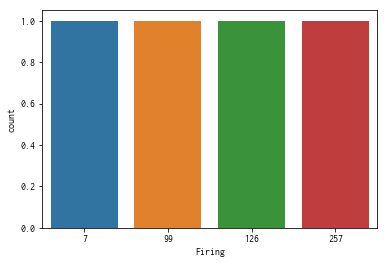

In [24]:
df['Firing'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Firing'].value_counts())

In [25]:
df['Firing'].value_counts()

oxidation      257
ox. or red.    126
reduction       99
raku             7
Name: Firing, dtype: int64

In [26]:
df = pd.concat([df, pd.get_dummies(df['Firing'], prefix='Firing_', dummy_na=True)], axis=1)
df = df.drop('Firing', axis=1)

# Transparency

In [27]:
df['Transparency'] = df['Transparency'].str.lower()
df['Transparency'].value_counts()

opaque         166
transparent    156
translucent     43
semi-opaque     17
Name: Transparency, dtype: int64

In [28]:
df.drop('Transparency', axis=1, inplace=True)

# Recipe

In [29]:
recipe = []

In [30]:
ingredients = []
for col in df.columns:
    if col.startswith('Recipe'):
        for ix in range(df.shape[0]):
            ingredients.append(str(df[col][ix]).split('\t')[0:2])
df_ingredients = pd.DataFrame(ingredients)
df_ingredients.columns = ['ingredient', 'amount']

In [31]:
df_ingredients['amount'] = df_ingredients['amount'].astype('float64')

In [32]:
df_ingredients

,ingredient,amount
0,Flint,40.4
1,Custer feldspar,46.0
2,Feldspar,62.5
3,Barium carbonate,36.6
4,Strontium carbonate,27.5
5,Barnard clay,33.0
6,Wood ash,22.0
7,Custer feldspar,26.5
8,Custer feldspar,19.0
9,Custer feldspar,30.0


In [33]:
df_ingredients['ingredient'] = df_ingredients['ingredient'].str.lower()
len(df_ingredients['ingredient'].unique())

226

In [34]:
for ingredient in df_ingredients['ingredient'].unique():
    df[ingredient] = np.NaN

In [35]:
for iing in range(int(len(df_ingredients)/len(df))):
    for ix in range(len(df)):
        ingredient = df_ingredients['ingredient'][len(df)*iing + ix]
        amount = df_ingredients['amount'][len(df)*iing + ix]
        df[ingredient][ix] = amount

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
for col in df.columns:
    if col.startswith('Recipe'):
        df.drop(str(col), axis=1, inplace=True)

In [37]:
df

,Color,Cone__1,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,frit 3134,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,plastic vitrox,lithium carbonate,redart,ocmulgee,fireclay,ranger red clay,talc theoretical,tennessee ball clay,ball clay,pemco frit p-54,nepheline sye,frit 3289,frit 3185,magnesium carbonate,gerstley borate57.10,soda feldspar - theoretical,frit pb-83,...,calcium carbonate,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,nan,copper carbonate,red iron oxide,macaloid,neph sy,magnesium carb,missouri fire clay,"grog, med",bell dark ball clay,lizella red,zircopax,lepidolite,potspar,barium sulfate,spodumene - theoretical,pyrax,pioneer kaolin,rutile,tennessee #5 ball clay,petalite,grolleg kaolin,georgia kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,lead carbonate,manganese dioxide,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,tin oxide,zinc,silica (325m),yellow ochre,chrome oxide,iron oxide,gillespie borate,epsom salts,newman red,kaopaque,tin,clay,fluorspar,pioneer talc,zircopax plus,chromium oxide,mason stain 6600,black iron oxide,barium carb,cedar heights redart clay,ochre,titanium dioxide,manganese carbonate,sodium silicate,molochite,kyanite,cobalt stain,copper oxide red,sand,ball clay bell dark,alumina hydrate,black stain,mount st. helens volcanic ash,cmc,potterycrafts frit p2960,nickel carbonate,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),v-gum t,fine grog,lincoln fire clay,darvan 7,black mason stain,rutile (granular),opax,nylon fiber,volcanic ash - mt. st. helens,burnt sienna,ferric oxide,red iron ox,amblygonite,silica sand
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,46.00,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.30,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.

In [38]:
df.drop('nan', axis=1, inplace=True)

In [39]:
df

,Color,Cone__1,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,frit 3134,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,plastic vitrox,lithium carbonate,redart,ocmulgee,fireclay,ranger red clay,talc theoretical,tennessee ball clay,ball clay,pemco frit p-54,nepheline sye,frit 3289,frit 3185,magnesium carbonate,gerstley borate57.10,soda feldspar - theoretical,frit pb-83,...,epk kaolin,calcium carbonate,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,copper carbonate,red iron oxide,macaloid,neph sy,magnesium carb,missouri fire clay,"grog, med",bell dark ball clay,lizella red,zircopax,lepidolite,potspar,barium sulfate,spodumene - theoretical,pyrax,pioneer kaolin,rutile,tennessee #5 ball clay,petalite,grolleg kaolin,georgia kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,lead carbonate,manganese dioxide,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,tin oxide,zinc,silica (325m),yellow ochre,chrome oxide,iron oxide,gillespie borate,epsom salts,newman red,kaopaque,tin,clay,fluorspar,pioneer talc,zircopax plus,chromium oxide,mason stain 6600,black iron oxide,barium carb,cedar heights redart clay,ochre,titanium dioxide,manganese carbonate,sodium silicate,molochite,kyanite,cobalt stain,copper oxide red,sand,ball clay bell dark,alumina hydrate,black stain,mount st. helens volcanic ash,cmc,potterycrafts frit p2960,nickel carbonate,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),v-gum t,fine grog,lincoln fire clay,darvan 7,black mason stain,rutile (granular),opax,nylon fiber,volcanic ash - mt. st. helens,burnt sienna,ferric oxide,red iron ox,amblygonite,silica sand
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,46.00,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.30,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

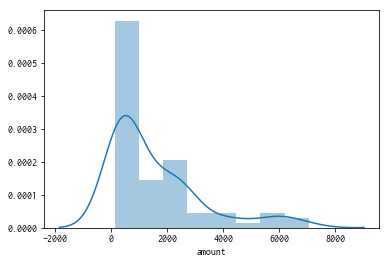

In [40]:
tmp = df_ingredients['amount'][pd.notna(df_ingredients['amount'])]
sns.distplot(tmp[tmp>100])

In [41]:
tmp[tmp>100]

112     2500.0
113     2500.0
242      464.0
341      174.8
349      174.8
365     2080.0
366     5883.0
368     7059.0
369     2640.0
370     2000.0
449     4357.0
453     4000.0
511      150.0
540      400.0
541      400.0
542      842.0
657     2500.0
658     2500.0
787      576.0
910     1600.0
911      470.0
913      470.0
914     1840.0
915     2000.0
994      792.0
998     3000.0
1056     150.0
1085    6400.0
1086    5200.0
1087     842.0
         ...  
2000     320.0
2001     627.0
2003    1412.0
2004     480.0
2005     800.0
2084    1822.0
2088    5800.0
2175     400.0
2176     400.0
2177    2106.0
2292    1000.0
2293    1000.0
2422     240.0
2545     800.0
2546     314.0
2549     320.0
2550     800.0
2629     554.0
2633    3000.0
2721     400.0
3090     800.0
3091     157.0
3094    2160.0
3178    3200.0
3265     240.0
3266     240.0
3636     157.0
3723     140.0
3810     160.0
4355     160.0
Name: amount, Length: 79, dtype: float64

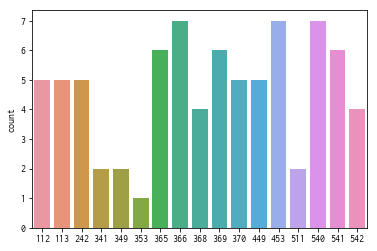

In [42]:
sns.countplot(tmp[tmp>100].index%df.shape[0])

In [43]:
del_ix = tmp[tmp>100].index%df.shape[0]

In [44]:
del_ix

Int64Index([112, 113, 242, 341, 349, 365, 366, 368, 369, 370, 449, 453, 511,
            540, 541, 542, 112, 113, 242, 365, 366, 368, 369, 370, 449, 453,
            511, 540, 541, 542, 112, 113, 242, 365, 366, 368, 369, 370, 449,
            453, 540, 541, 542, 112, 113, 242, 341, 349, 353, 365, 366, 368,
            369, 370, 449, 453, 540, 541, 542, 112, 113, 242, 365, 366, 369,
            370, 449, 453, 541, 365, 366, 369, 453, 540, 541, 366, 453, 540,
            540],
           dtype='int64')

In [45]:
df.drop(index=del_ix, inplace=True)
df.reset_index(drop=True, inplace=True)

In [46]:
df

,Color,Cone__1,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,frit 3134,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,plastic vitrox,lithium carbonate,redart,ocmulgee,fireclay,ranger red clay,talc theoretical,tennessee ball clay,ball clay,pemco frit p-54,nepheline sye,frit 3289,frit 3185,magnesium carbonate,gerstley borate57.10,soda feldspar - theoretical,frit pb-83,...,epk kaolin,calcium carbonate,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,copper carbonate,red iron oxide,macaloid,neph sy,magnesium carb,missouri fire clay,"grog, med",bell dark ball clay,lizella red,zircopax,lepidolite,potspar,barium sulfate,spodumene - theoretical,pyrax,pioneer kaolin,rutile,tennessee #5 ball clay,petalite,grolleg kaolin,georgia kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,lead carbonate,manganese dioxide,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,tin oxide,zinc,silica (325m),yellow ochre,chrome oxide,iron oxide,gillespie borate,epsom salts,newman red,kaopaque,tin,clay,fluorspar,pioneer talc,zircopax plus,chromium oxide,mason stain 6600,black iron oxide,barium carb,cedar heights redart clay,ochre,titanium dioxide,manganese carbonate,sodium silicate,molochite,kyanite,cobalt stain,copper oxide red,sand,ball clay bell dark,alumina hydrate,black stain,mount st. helens volcanic ash,cmc,potterycrafts frit p2960,nickel carbonate,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),v-gum t,fine grog,lincoln fire clay,darvan 7,black mason stain,rutile (granular),opax,nylon fiber,volcanic ash - mt. st. helens,burnt sienna,ferric oxide,red iron ox,amblygonite,silica sand
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,46.00,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.30,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [47]:
df_ingredients['ingredient'].str.lower().value_counts()

nan                         4292
whiting                      226
epk                          215
flint                        206
silica                       165
gerstley borate              144
custer feldspar              137
bentonite                    132
nepheline syenite            119
dolomite                      87
ball clay                     80
copper carbonate              77
red iron oxide                75
barium carbonate              74
zinc oxide                    68
kaolin                        57
talc                          53
lithium carbonate             52
kentucky om #4                49
wollastonite                  42
strontium carbonate           41
cobalt carbonate              39
cobalt oxide                  39
frit 3134                     36
redart                        36
frit 3124                     34
manganese dioxide             33
potash feldspar               30
tin oxide                     30
goldart                       30
          

In [48]:
tmp = []
threshold = df.shape[0]/100
for i in range(df_ingredients['ingredient'].nunique()):
    if df_ingredients['ingredient'].value_counts(sort=False)[i] < threshold:
        tmp.append(df_ingredients['ingredient'].value_counts(sort=False).index[i])
len(tmp)

152

In [49]:
tmp.sort()

In [50]:
tmp

['#6 tile clay',
 'albany slip clay',
 'alumina',
 'alumina hydrate',
 'amblygonite',
 'ash wood',
 'avery kaolin',
 'ball clay bell dark',
 'barium carb',
 'barium sulfate',
 'barnard slip',
 'bell dark ball clay',
 'black mason stain',
 'black nickel oxide',
 'black stain',
 'boric acid',
 'burnt sienna',
 'c & c',
 'calcined kaolin',
 'calcium carbonate',
 'calvert clay',
 'carbondale red',
 'cedar heights redart',
 'cedar heights redart clay',
 'chromium oxide',
 'clay',
 'cmc',
 'cobalt oxide, black',
 'cobalt stain',
 'copper oxide',
 'copper oxide red',
 'cryolite',
 'cullet (container glass)',
 'darvan',
 'darvan 7',
 'epk kaolin',
 'f-4 feldspar',
 'f-4 spar',
 'feldspar - theoretical',
 'ferric oxide',
 'ferro frit 3110',
 'ferro frit 3134',
 'ferro frit 3269',
 'ferro frit 3292',
 'fine grog',
 'fireclay',
 'flint (silica)',
 'fluorspar',
 'frit 3185',
 'frit 3269',
 'frit 3278',
 'frit 3289',
 'frit 3293',
 'frit 3819',
 'frit p-25',
 'frit p-54',
 'frit pb-83',
 'fusion fr

# modeling

In [51]:
df

,Color,Cone__1,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,frit 3134,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,plastic vitrox,lithium carbonate,redart,ocmulgee,fireclay,ranger red clay,talc theoretical,tennessee ball clay,ball clay,pemco frit p-54,nepheline sye,frit 3289,frit 3185,magnesium carbonate,gerstley borate57.10,soda feldspar - theoretical,frit pb-83,...,epk kaolin,calcium carbonate,cryolite,tennessee #10,cobalt oxide,"cobalt oxide, black",cobalt carbonate,tennessee #1,lincoln,copper carbonate,red iron oxide,macaloid,neph sy,magnesium carb,missouri fire clay,"grog, med",bell dark ball clay,lizella red,zircopax,lepidolite,potspar,barium sulfate,spodumene - theoretical,pyrax,pioneer kaolin,rutile,tennessee #5 ball clay,petalite,grolleg kaolin,georgia kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,lead carbonate,manganese dioxide,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,tin oxide,zinc,silica (325m),yellow ochre,chrome oxide,iron oxide,gillespie borate,epsom salts,newman red,kaopaque,tin,clay,fluorspar,pioneer talc,zircopax plus,chromium oxide,mason stain 6600,black iron oxide,barium carb,cedar heights redart clay,ochre,titanium dioxide,manganese carbonate,sodium silicate,molochite,kyanite,cobalt stain,copper oxide red,sand,ball clay bell dark,alumina hydrate,black stain,mount st. helens volcanic ash,cmc,potterycrafts frit p2960,nickel carbonate,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,nickel oxide,mullite,talc (ny),v-gum t,fine grog,lincoln fire clay,darvan 7,black mason stain,rutile (granular),opax,nylon fiber,volcanic ash - mt. st. helens,burnt sienna,ferric oxide,red iron ox,amblygonite,silica sand
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,46.00,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.30,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [52]:
X = df.drop('Color', axis=1)
y = df['Color']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
import lightgbm
#from sklearn.linear_model import LogisticRegression

clf = lightgbm.LGBMClassifier()
#clf = LogisticRegression()

clf.fit(X_train, y_train)
predict = clf.predict(X_test)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
df_check = pd.DataFrame(predict, np.array(y_test))
df_check

,0
white,white
black,green
amber,brown
blue,blue
blue,blue
clear,white
clear,clear
clear,clear
clear,clear
white,white


In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-pac

In [57]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['feature_importance'])
feature_importance.sort_values(by=['feature_importance'], ascending=False)

,feature_importance
whiting,1872
epk,1669
flint,1454
silica,1171
Firing__oxidation,1040
gerstley borate,852
custer feldspar,786
nepheline syenite,633
ball clay,513
bentonite,507


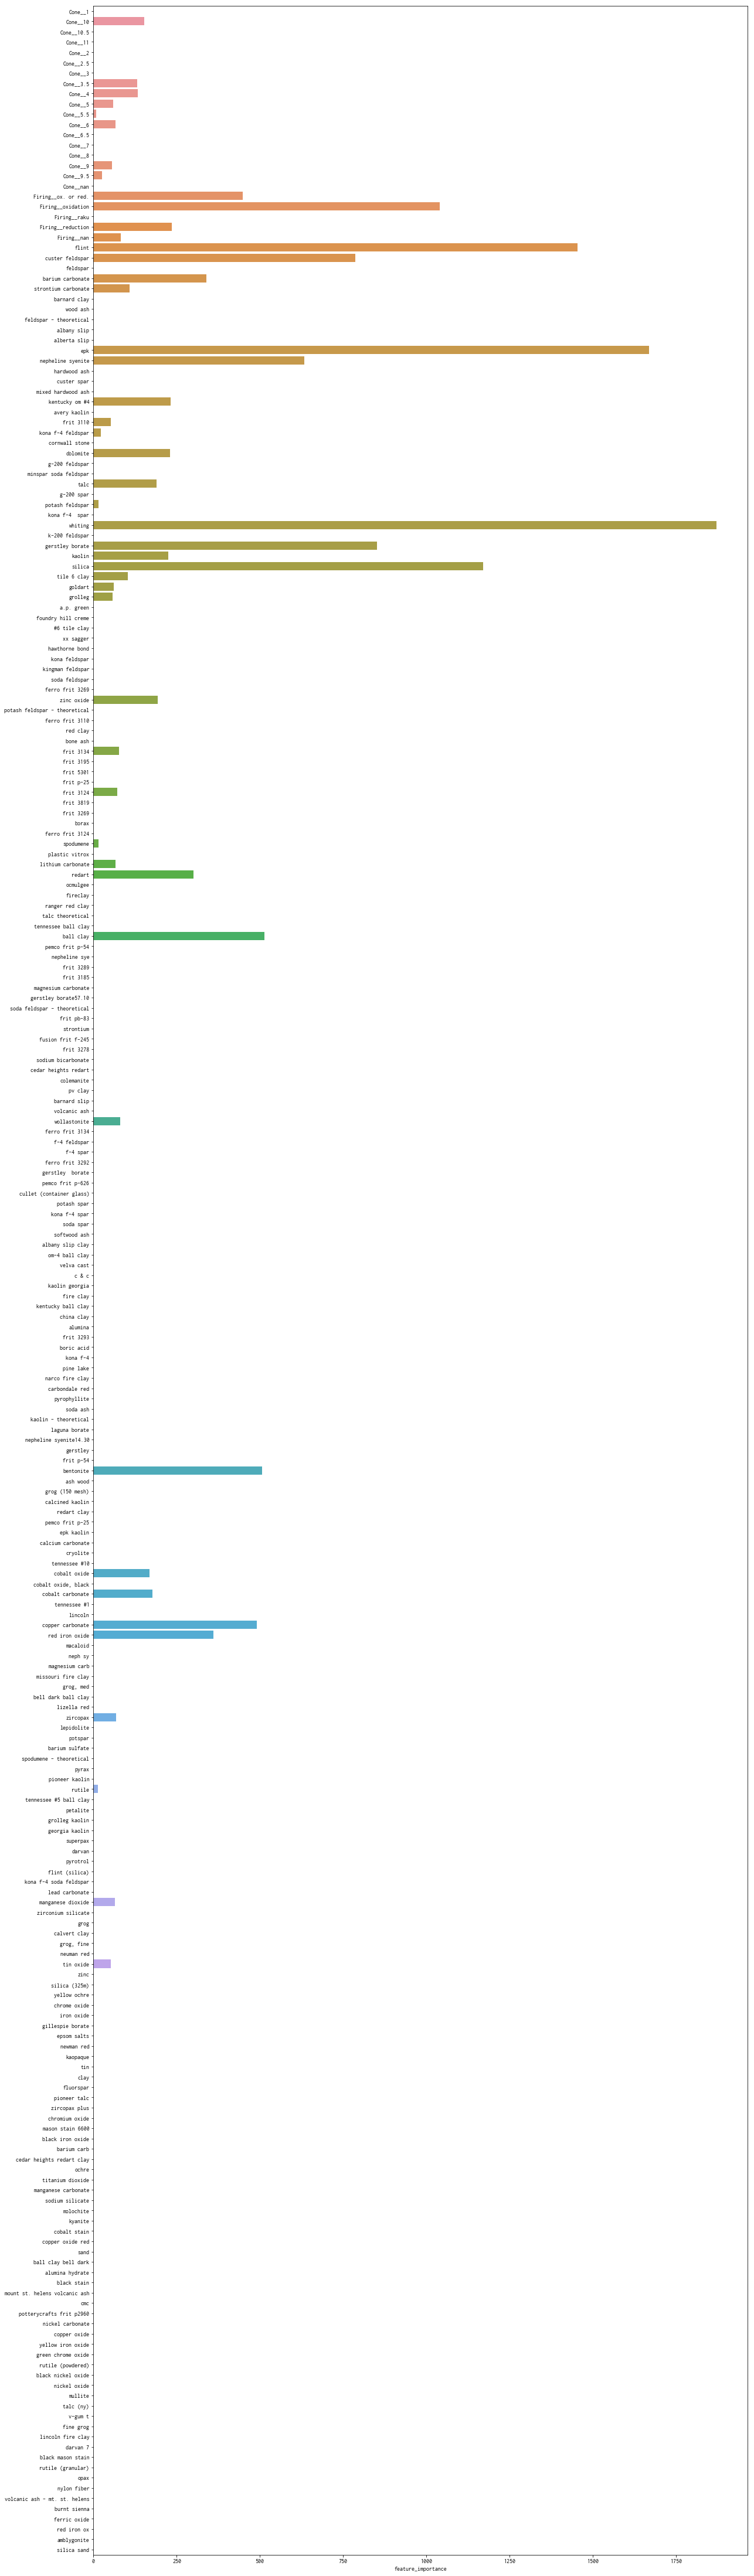

In [58]:
plt.figure(figsize=(20, 80))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance.index)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

      amber       0.40      0.67      0.50         6
      black       0.55      0.92      0.69        12
       blue       0.71      0.31      0.43        16
      brown       0.60      0.30      0.40        10
      clear       0.76      0.78      0.77        37
      green       0.50      0.53      0.52        15
     orange       0.75      0.60      0.67         5
        red       0.67      0.67      0.67         3
        tan       0.33      0.50      0.40         2
  turquoise       0.50      0.25      0.33         4
      white       0.58      0.64      0.61        22

avg / total       0.63      0.61      0.60       132



In [60]:
scores

array([0.37837838, 0.59633028, 0.56603774, 0.51485149, 0.53465347])